# Feature Selection Methods

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <font color='red'> Filter Method </font> 

##### <font color='blue'> 1. Variance Threshold </font> 
- The VarianceThreshold from sklearn provides a simple baseline approach to feature selection. It removes all features which variance doesn’t meet a certain threshold. By default, it removes all zero-variance features (constant features, i.e., features that have the same value in all samples).

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold

In [3]:
# load the dataset

data = pd.read_excel('/content/Raisin_Dataset.xlsx')
data

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2    0.637613   1208.575  Kecimen  
3    0.699599    844.162  Kecimen  
4    0.792772   1073.251  Kecimen  
..        ...        ...      ...  
895  0.668793   1129.072    Besni  
896  0.636476   1214.252    Besni  
897  0.741099   1292.828    Besni  
898  0.658798   1258.548    Besni  
899  0.632020   1272.862    Besni  

[900 rows x 8 columns]

In [4]:
# split dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Class'], axis=1),  # drop the target
    data['Class'], 
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((630, 7), (270, 7))

In [ ]:
# The VarianceThreshold from sklearn provides a simple baseline approach to feature selection. 
# It removes all features which variance doesn’t meet a certain threshold. 
# By default, it removes all zero-variance features, i.e., features that have the same value in all samples.

In [5]:
sel = VarianceThreshold(threshold=0)

sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [6]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant

# (go ahead and print the result of sel.get_support() to understand its output)

sum(sel.get_support())

7

In [7]:
# now let's print the number of constant feautures
# (see how we use ~ to exclude non-constant features)

constant = X_train.columns[~sel.get_support()]

len(constant)

0

In [8]:
# let's print the constant variable names

constant

Index([], dtype='object')

In [ ]:
# let's visualise the values of one of the constant variables
# as an example

X_train['Weight'].unique()

In [ ]:
X_train.drop(labels=constant, axis=1, inplace=True)
X_test.drop(labels=constant, axis=1, inplace=True)

X_train.shape, X_test.shape

##### <font color='blue'> 2. Correlation Coefficient </font>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = sns.load_dataset('diamonds')
df

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

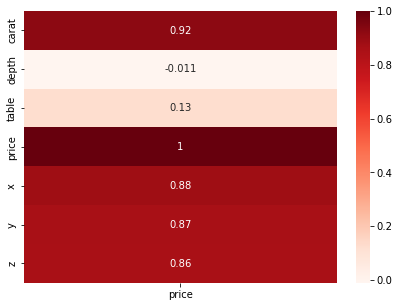

In [ ]:
# compute correlation with target variable
target_correlation = df.corr()[['price']] 
plt.figure(figsize=(7,5))
sns.heatmap(target_correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
target_correlation[abs(target_correlation)>0.5].dropna()

price
carat  0.921591
price  1.000000
x      0.884435
y      0.865421
z      0.861249

##### <font color='blue'> 3. Duplicated Features </font>

In [ ]:
# load packages
import pandas as pd 
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features

# load dataset
df = pd.read_csv('Dataset_1.csv')

In [ ]:
df

In [ ]:
# function to detect duplicate features
duplicate_features = get_duplicate_features(df)
duplicate_features.head(2)

Desc       feature1       feature2
0  Duplicate Values  Reflectance R           Ref1
1   Duplicate Index  wavelength nm  Reflectance R

In [ ]:
# all the duplicate features as list
duplicate_features_list = duplicate_features.query("Desc=='Duplicate Values'")['feature2'].to_list()
print(duplicate_features_list)

['Ref1']


In [ ]:
# drop these duplicate features from dataset
print('Shape of Dataset before dropping the duplicate values features: ', df.shape)
df.drop(columns = duplicate_features_list, inplace=True)
print('Shape of Dataset after dropping the duplicate values features: ', df.shape)

Shape of Dataset before dropping the duplicate values features:  (20, 3)
Shape of Dataset after dropping the duplicate values features:  (20, 2)


In [ ]:
# 2. Remove duplicate columns with Python program

In [ ]:
data = pd.read_csv('Dataset_1.csv')
data

In [ ]:
# Create a function to remove the duplicate columns
def duplicate_cols(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [ ]:
duplicate_cols(data)

['Ref1']

##### <font color='blue'> 4.Information Gain </font>

Information gain of each attribute is calculated considering the target values for feature selection.
It is defined as the amount of information provided by the feature for identifying the target value and measures reduction in the entropy values.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('diabetes1.csv')
#df

In [ ]:
X = df.iloc[:,0:8]
y = df.Outcome

In [ ]:
# Feature Selection using Information Gain,

from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)

In [ ]:
imp_column = pd.DataFrame(mutual_info_classif(X,y), index=X.columns)
imp_column

##### <font color='blue'> 5. Chi Square </font>

In [11]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
  
# Load iris data
iris_dataset = load_iris()
  
# Create features and target
X = iris_dataset.data
y = iris_dataset.target
  
# Convert to categorical data by converting data to integers
X = X.astype(int)

In [12]:
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(X, y)

In [14]:
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 4
Reduced feature number: 2
